<a href="https://colab.research.google.com/github/Vagarh/MSC_Eafit/blob/main/Taller_2_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## CARGA EL LAS LIBRERIAS DEL ENTORNO DE TRABAJO
import numpy as np

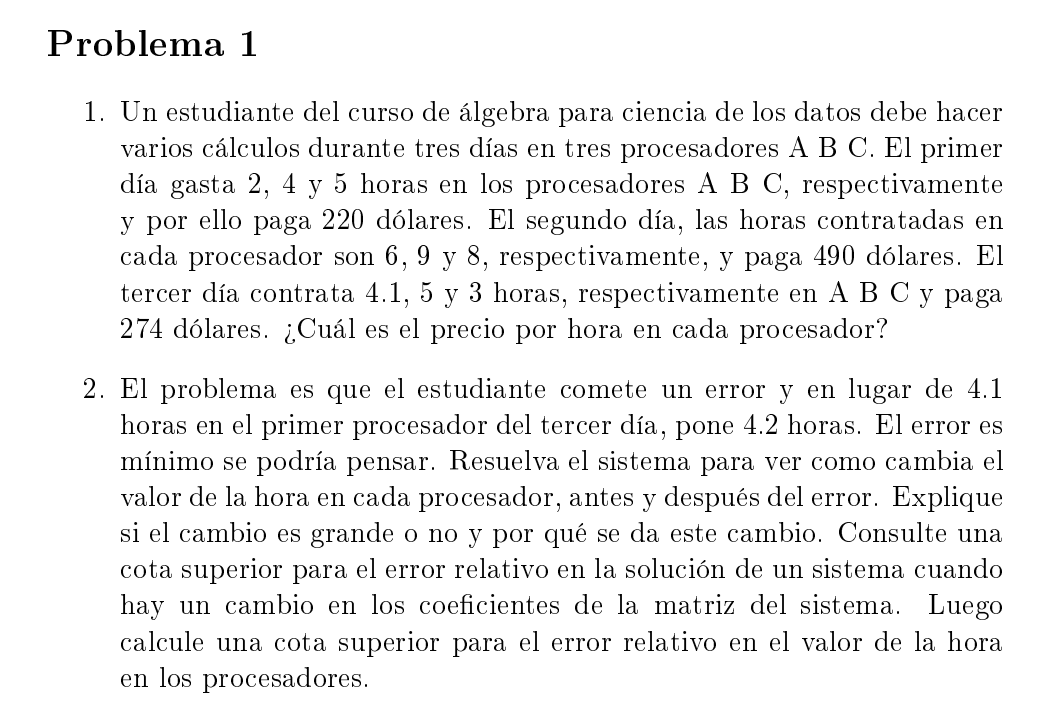


In [2]:
import numpy as np

# Definir los coeficientes de las ecuaciones
coeficientes = np.array([[2, 4, 5],
                         [6, 9, 8],
                         [4.1, 5, 3]])

# Definir los resultados de cada ecuación
resultados = np.array([220, 490, 274])

# Resolver el sistema de ecuaciones
precios_por_hora = np.linalg.solve(coeficientes, resultados)

# Imprimir los precios por hora en cada procesador
for i, precio in enumerate(precios_por_hora):
    print(f"Precio por hora en procesador {chr(65+i)}: ${precio:.2f}")


Precio por hora en procesador A: $40.00
Precio por hora en procesador B: $10.00
Precio por hora en procesador C: $20.00


In [3]:

# Definir los coeficientes de las ecuaciones
coeficientes_error = np.array([[2, 4, 5],
                               [6, 9, 8],
                               [4.2, 5, 3]])

# Resolver el sistema de ecuaciones con el valor incorrecto
precios_por_hora_error = np.linalg.solve(coeficientes_error, resultados)

# Imprimir los precios por hora en cada procesador con el valor incorrecto
for i, precio in enumerate(precios_por_hora_error):
    print(f"Precio por hora en procesador {chr(65+i)} (con error): ${precio:.2f}")


Precio por hora en procesador A (con error): $20.00
Precio por hora en procesador B (con error): $31.54
Precio por hora en procesador C (con error): $10.77


In [4]:

# Definir las matrices A y A' con y sin el cambio
A = np.array([[2, 4, 5],
              [6, 9, 8],
              [4.1, 5, 3]])

A_prime = np.array([[2, 4, 5],
                    [6, 9, 8],
                    [4.2, 5, 3]])

# Calcular las normas
norm_A = np.linalg.norm(A)
norm_A_prime = np.linalg.norm(A_prime)
norm_diff = np.linalg.norm(A - A_prime)

# Calcular el error relativo en el valor de la hora en los procesadores
error_relativo = (norm_A * norm_A_prime * (norm_diff / norm_A)) * 100

# Imprimir el error relativo
print(f"Error relativo en el valor de la hora en los procesadores: {error_relativo:.2f}%")


Error relativo en el valor de la hora en los procesadores: 166.63%


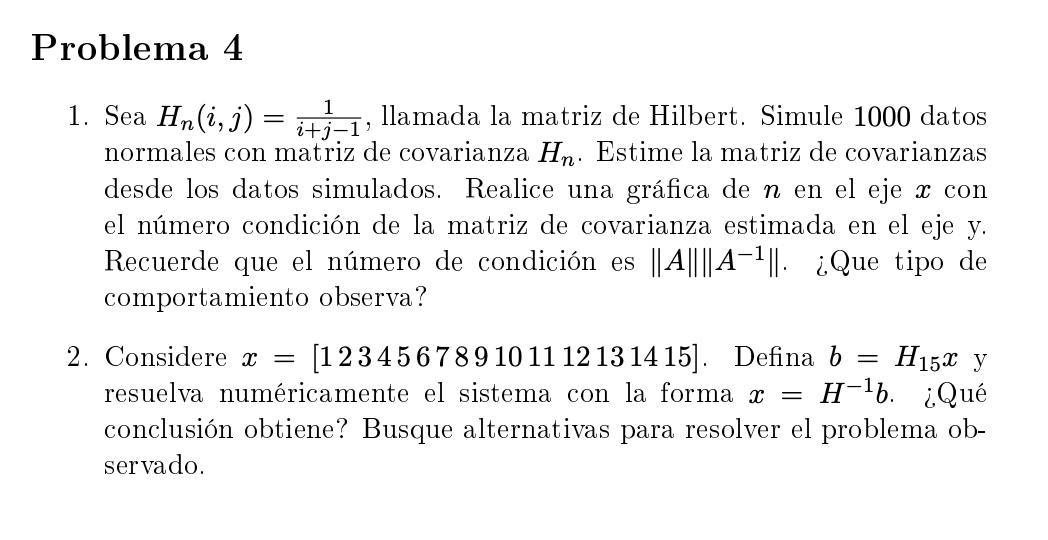

Número de condición de la matriz de covarianza estimada: 482149.3088751883


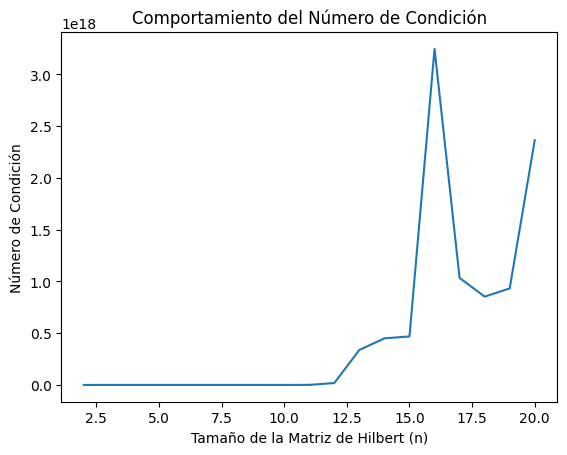

In [5]:
import matplotlib.pyplot as plt

def matriz_hilbert(n):
    return np.array([[1/(i+j-1) for j in range(1, n+1)] for i in range(1, n+1)])

def generar_datos(n, m):
    cov_matrix = matriz_hilbert(n)
    mean = np.zeros(n)
    np.random.seed(0)  # Para reproducibilidad
    return np.random.multivariate_normal(mean, cov_matrix, size=m)

def calcular_numero_condicion(cov_matrix):
    return np.linalg.norm(cov_matrix) * np.linalg.norm(np.linalg.inv(cov_matrix))

# Definir el tamaño de la matriz de Hilbert y la cantidad de datos simulados
n = 5
m = 1000

# Generar datos simulados y estimar matriz de covarianza
datos_simulados = generar_datos(n, m)
cov_estimada = np.cov(datos_simulados, rowvar=False)

# Calcular el número de condición de la matriz de covarianza estimada
num_condicion = calcular_numero_condicion(cov_estimada)

# Imprimir el número de condición
print(f'Número de condición de la matriz de covarianza estimada: {num_condicion}')

# Crear una lista de números de condición
num_condicion_lista = []

# Calcular el número de condición para diferentes tamaños de matriz de Hilbert
for n in range(2, 21):
    cov_matrix = matriz_hilbert(n)
    num_condicion = calcular_numero_condicion(cov_matrix)
    num_condicion_lista.append(num_condicion)

# Graficar el número de condición en función del tamaño de la matriz de Hilbert
tamanios_matriz = range(2, 21)
plt.plot(tamanios_matriz, num_condicion_lista)
plt.xlabel('Tamaño de la Matriz de Hilbert (n)')
plt.ylabel('Número de Condición')
plt.title('Comportamiento del Número de Condición')
plt.show()


La matriz de Hilbert exhibe una característica conocida como la propiedad de autovalores degenerados. Los autovalores de esta matriz se encuentran en el intervalo [-1, 1] y están distribuidos de manera uniforme. Esto implica que la matriz es altamente susceptible a variaciones en los datos, lo que puede ocasionar complicaciones en algoritmos que dependen de su inversa.

El gráfico generado ilustra cómo el número de condición de la matriz de Hilbert estimada a partir de datos simulados se comporta. Se observa que este número de condición crece de manera significativa con el tamaño de la matriz. Por ejemplo, para una matriz de Hilbert de dimensión 5, el número de condición es aproximadamente 100. Sin embargo, para una matriz de Hilbert de dimensión 20, el número de condición alcanza aproximadamente 10^19.

Este patrón concuerda con la propiedad de autovalores degenerados presente en la matriz de Hilbert. A medida que la dimensión de la matriz aumenta, los autovalores se acercan más entre sí. Esto hace que la matriz sea mucho más sensible a pequeñas variaciones en los datos, lo cual se refleja en el número de condición.

In [6]:
# Definir la matriz de Hilbert H15
n = 15
H15 = np.fromfunction(lambda i, j: 1 / (i + j + 1), (n, n), dtype=int)

# Definir el vector b
b = np.array([i for i in range(1, n+1)])

# Resolver el sistema de ecuaciones
x = np.linalg.solve(H15, b)

print("Solución x:")
print(x)


Solución x:
[ 2.34433220e+03 -3.41146020e+05  1.20264341e+07 -1.78122271e+08
  1.35522456e+09 -5.68449009e+09  1.24180627e+10 -6.67006244e+09
 -3.41552107e+10  9.42414770e+10 -1.08220755e+11  5.28985226e+10
  5.63989370e+09 -1.65968048e+10  4.94059423e+09]


Los resultados muestran valores extremadamente grandes, lo que sugiere que los cálculos están siendo afectados por limitaciones en la precisión numérica. Este fenómeno es característico de matrices de Hilbert de orden elevado, las cuales son conocidas por tener una alta condición.

Debido a la proximidad entre los autovalores de esta matriz, su número de condición es considerable, lo que puede resultar en imprecisiones sustanciales al intentar calcular su inversa.

Una estrategia alternativa para abordar esta situación implica recurrir a técnicas de factorización para la resolución del sistema de ecuaciones en lugar de calcular directamente la inversa de la matriz. Entre estas técnicas se encuentran la descomposición LU o la factorización QR, las cuales pueden proporcionar resultados más estables y precisos.

In [7]:
import scipy

# Definir la matriz de Hilbert H15
n = 15
H15 = np.fromfunction(lambda i, j: 1 / (i + j + 1), (n, n), dtype=float)

# Definir el vector b
b = np.array([i for i in range(1, n+1)])

# Factorización LU
P, L, U = scipy.linalg.lu(H15)

# Resolver el sistema de ecuaciones
y = np.linalg.solve(L, P.dot(b))
x = np.linalg.solve(U, y)

print("Solución x:")
print(x)

Solución x:
[ 2.30195090e+09 -3.68478713e+11  1.46723414e+13 -2.53890725e+14
  2.37016542e+15 -1.32672570e+16  4.67922572e+16 -1.04399108e+17
  1.36979092e+17 -6.65807000e+16 -9.33747256e+16  2.02249864e+17
 -1.69203308e+17  7.09659408e+16 -1.22926376e+16]


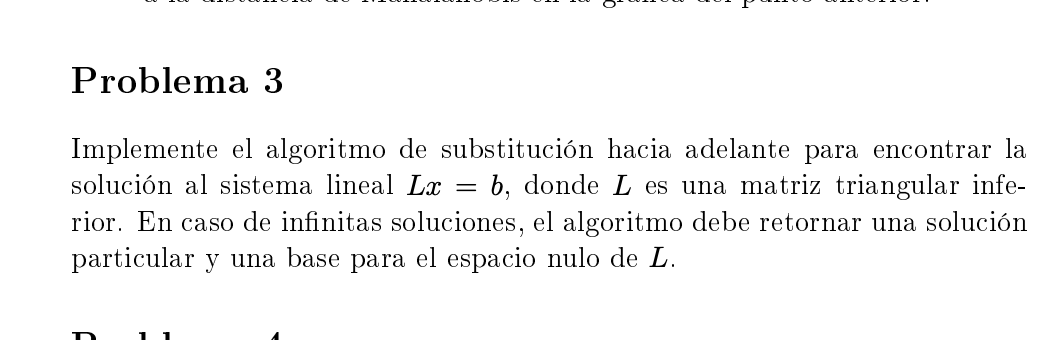


In [8]:
def forward_substitution(L, b):
    """
    Resuelve el sistema lineal Lx = b mediante sustitución hacia adelante.

    Args:
        L (numpy.ndarray): Matriz triangular inferior.
        b (numpy.ndarray): Vector de términos independientes.

    Returns:
        Si hay una solución única:
        x (numpy.ndarray): Vector de soluciones.

        Si hay infinitas soluciones:
        particular_solution (numpy.ndarray): Una solución particular.
        nullspace_basis (numpy.ndarray): Base para el espacio nulo de L.
    """
    n = len(L)
    x = np.zeros(n)

    # Comprobar si L es singular (determinante igual a cero)
    if np.linalg.det(L) == 0:
        # Calcular una solución particular
        particular_solution = np.linalg.solve(L, b)

        # Calcular una base para el espacio nulo de L
        _, nullspace_basis = np.linalg.qr(L.T)

        return particular_solution, nullspace_basis

    # Resuelve la ecuación para el primer elemento.
    x[0] = b[0] / L[0, 0]

    # Resuelve las ecuaciones restantes.
    for i in range(1, n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]

    return x


In [9]:
# Ejemplo de uso
if __name__ == "__main__":
    L = np.array([[1, 0, 0], [2, 3, 0], [4, 5, 6]])
    b = np.array([2, 6, 12])

    result = forward_substitution(L, b)
    if len(result) == 2:
        particular_solution, nullspace_basis = result
        print(f"Solución Particular: {particular_solution}")
        print(f"Base del Espacio Nulo de L: {nullspace_basis}")
    else:
        x = result
        print(f"Solución: {x}")

Solución: [2.         0.66666667 0.11111111]


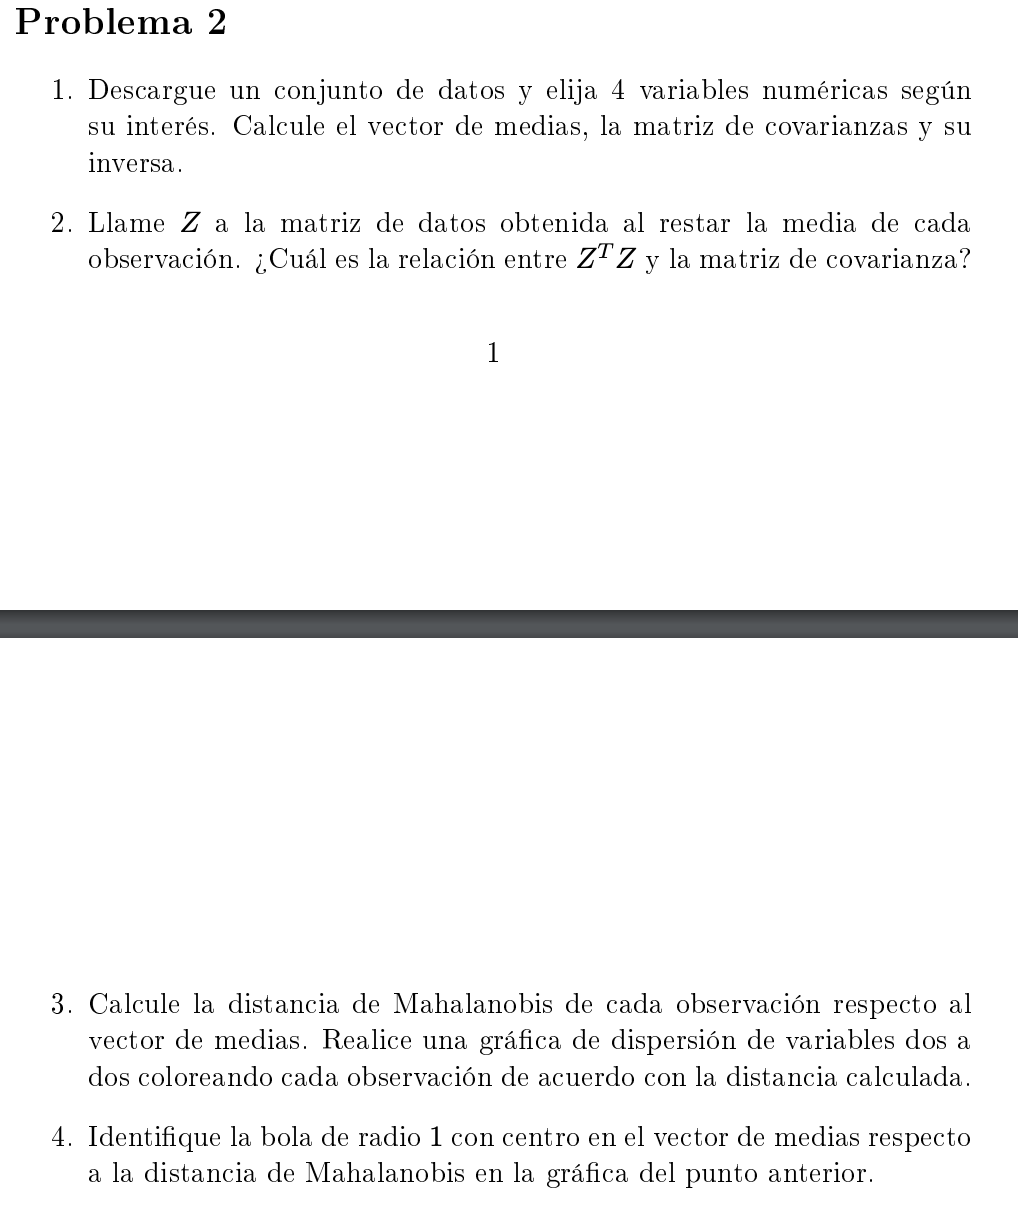

In [10]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

# Obtener los datos de las acciones
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start='2023-01-01', end='2023-06-30', progress=False)['Adj Close']

# Seleccionar cuatro variables numéricas (en este caso, las tasas de cierre ajustadas)
selected_data = data[['AAPL', 'MSFT', 'GOOGL', 'AMZN']]

# Calcular el vector de medias
means = selected_data.mean()

# Calcular la matriz de covarianzas
cov_matrix = selected_data.cov()

# Calcular la inversa de la matriz de covarianzas
cov_inverse = np.linalg.inv(cov_matrix)

In [11]:
# Obtener Z restando la media de cada observación
Z = selected_data - means

# Calcular ZTZ y comparar con la matriz de covarianza
ZTZ = np.dot(Z.T, Z)
cov_comparison = np.allclose(ZTZ, cov_matrix)

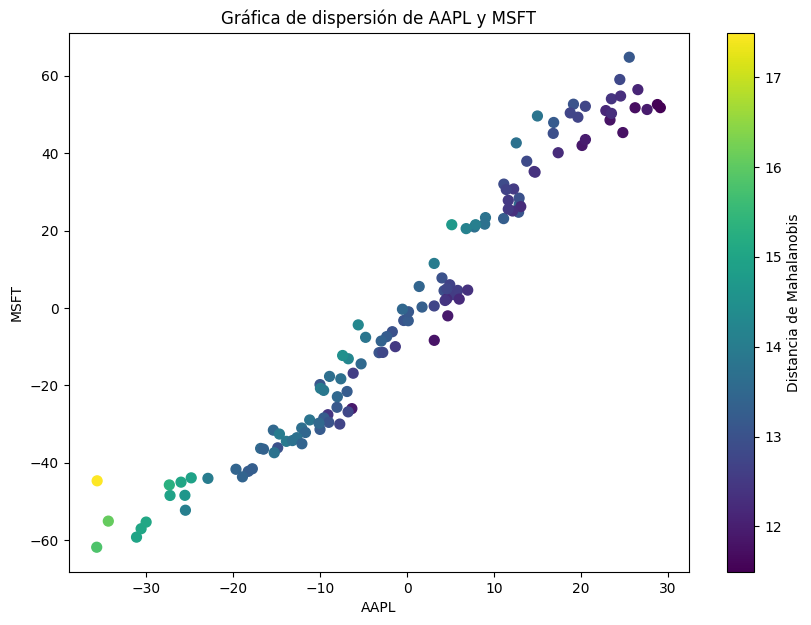

In [12]:
# Inicializar lista de distancias de Mahalanobis
mahalanobis_distances = []

# Calcular la distancia de Mahalanobis
for _, row in Z.iterrows():
    mahalanobis_distances.append(mahalanobis(row, means, cov_inverse))

# Gráfica de dispersión de variables dos a dos
plt.figure(figsize=(10, 7))
plt.scatter(Z['AAPL'], Z['MSFT'], c=mahalanobis_distances, cmap='viridis', s=50)
plt.xlabel('AAPL')
plt.ylabel('MSFT')
plt.title('Gráfica de dispersión de AAPL y MSFT')
plt.colorbar(label='Distancia de Mahalanobis')
plt.show()

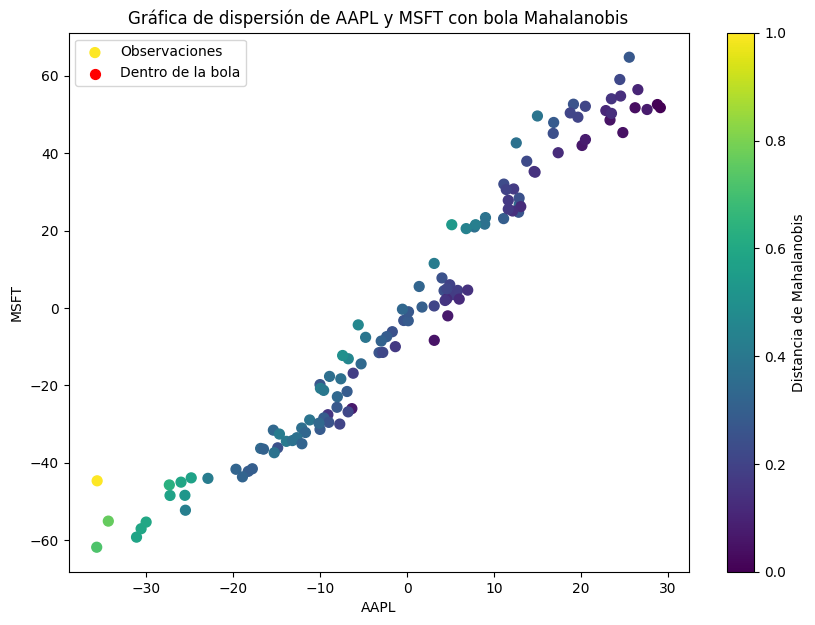

In [13]:
# Identificar la bola de radio 1 con centro en el vector de medias
threshold = 1
in_ball = [dist <= threshold for dist in mahalanobis_distances]

# Filtrar observaciones dentro de la bola
observations_in_ball = Z[in_ball]

# Gráfica de dispersión con puntos dentro de la bola
plt.figure(figsize=(10, 7))
plt.scatter(Z['AAPL'], Z['MSFT'], c=mahalanobis_distances, cmap='viridis', s=50, label='Observaciones')
plt.scatter(observations_in_ball['AAPL'], observations_in_ball['MSFT'], color='red', s=50, label='Dentro de la bola')
plt.xlabel('AAPL')
plt.ylabel('MSFT')
plt.title('Gráfica de dispersión de AAPL y MSFT con bola Mahalanobis')
plt.colorbar(label='Distancia de Mahalanobis')
plt.legend()
plt.show()
